In [ ]:
#!pip install astroquery
from astroquery.gaia import Gaia
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
# Load the Gaia table
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')

# Print the column names
for column in gaiadr3_table.columns:
    print(f"Column: {column.name}")
    print(f"Description: {column.description}")
    print()

Column: solution_id
Description: Solution Identifier

Column: designation
Description: Unique source designation (unique across all Data Releases)

Column: source_id
Description: Unique source identifier (unique within a particular Data Release)

Column: random_index
Description: Random index for use when selecting subsets

Column: ref_epoch
Description: Reference epoch

Column: ra
Description: Right ascension

Column: ra_error
Description: Standard error of right ascension

Column: dec
Description: Declination

Column: dec_error
Description: Standard error of declination

Column: parallax
Description: Parallax

Column: parallax_error
Description: Standard error of parallax

Column: parallax_over_error
Description: Parallax divided by its standard error

Column: pm
Description: Total proper motion

Column: pmra
Description: Proper motion in right ascension direction

Column: pmra_error
Description: Standard error of proper motion in right ascension direction

Column: pmdec
Description:

In [9]:

query = """
SELECT TOP 1000000 ra, dec, parallax, pmra, pmdec, phot_g_mean_mag,
bp_rp, phot_g_mean_mag+5*log10(parallax)-10 as mg, radial_velocity
FROM gaiadr3.gaia_source
WHERE parallax > 1.
"""

job = Gaia.launch_job(query)
results = job.get_results()
print(len(results))


1000000


In [10]:

gdata = results.to_pandas()
print(gdata)

                ra        dec  parallax      pmra     pmdec  phot_g_mean_mag  \
0       283.194654 -27.425909  1.196885  1.862290 -5.930697        19.751022   
1       283.193937 -27.433696  1.238822 -1.284142 -2.533913        19.374783   
2       283.193742 -27.432270  1.738663 -5.040737 -4.850680        19.897381   
3       282.602118 -27.460115  2.975687  1.919887  2.474817        19.900364   
4       281.921098 -27.649951  1.130814  0.596245 -3.559256        20.224800   
...            ...        ...       ...       ...       ...              ...   
999995   72.426437  54.366531  1.142377 -6.160780 -6.362609        16.138060   
999996  272.382298 -26.649470  1.837374 -4.147696  1.211940        16.283710   
999997  272.379549 -26.647971  1.454018 -2.154571 -8.503189        18.318363   
999998  273.035315 -26.198252  1.553634 -2.659795 -3.767016        19.539095   
999999  273.310492 -26.675567  1.531901 -0.759492 -8.244011        19.229086   

           bp_rp         mg  radial_vel

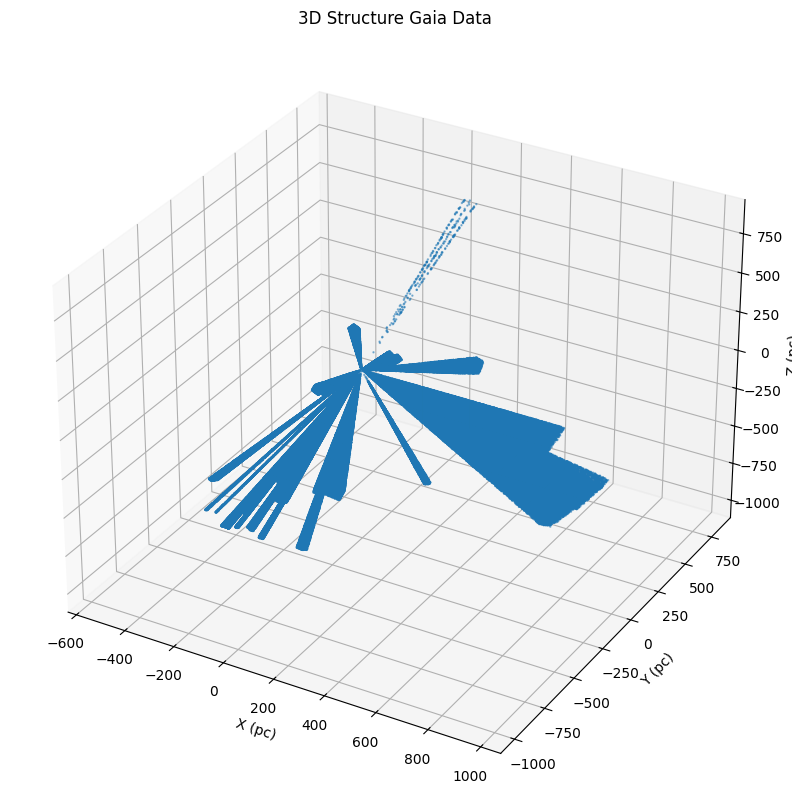

In [11]:


# Sample RA, Dec, and parallax arrays
ra = np.array(gdata['ra'])
dec = np.array(gdata['dec'])
parallax = np.array(gdata['parallax'])
bp_rp = np.array(gdata['bp_rp'])
mg = np.array(gdata['mg'])

# Convert parallax to distance (parsecs)
distance = 1000 / parallax

# Convert to Cartesian coordinates
x = distance * np.cos(np.radians(ra)) * np.cos(np.radians(dec))
y = distance * np.sin(np.radians(ra)) * np.cos(np.radians(dec))
z = distance * np.sin(np.radians(dec))

# Plot in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.5, alpha=0.5) 

ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_zlabel("Z (pc)")
plt.title("3D Structure Gaia Data")
plt.show()


887612
Magnitude if G filter data in array mg, with length  887612
Mag in G_BP filter - Mag in G_RP filter in array bp_rp, with length  887612


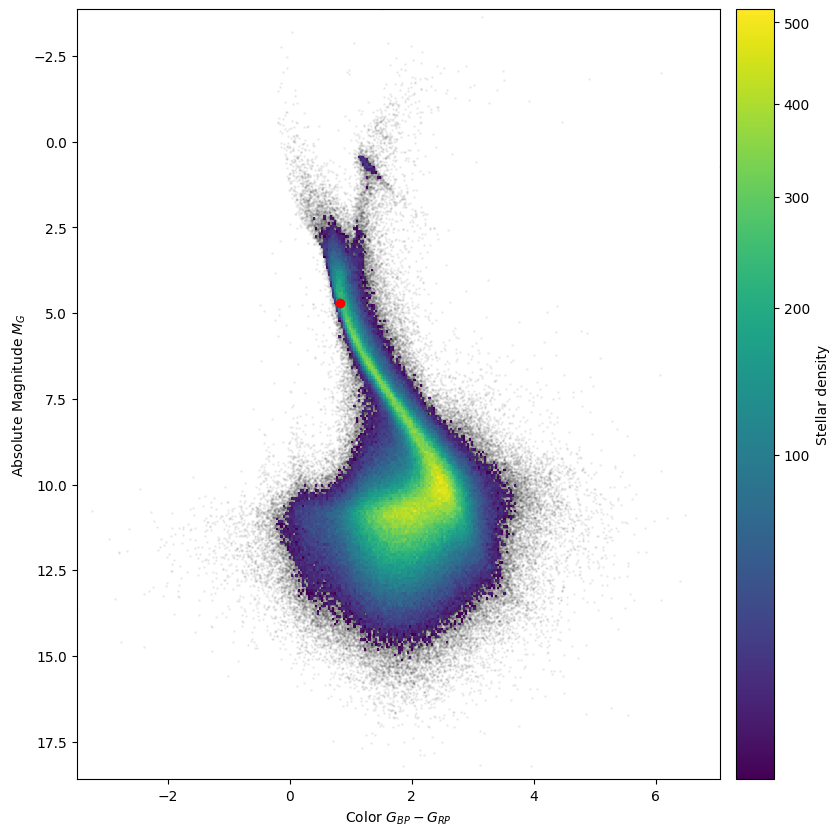

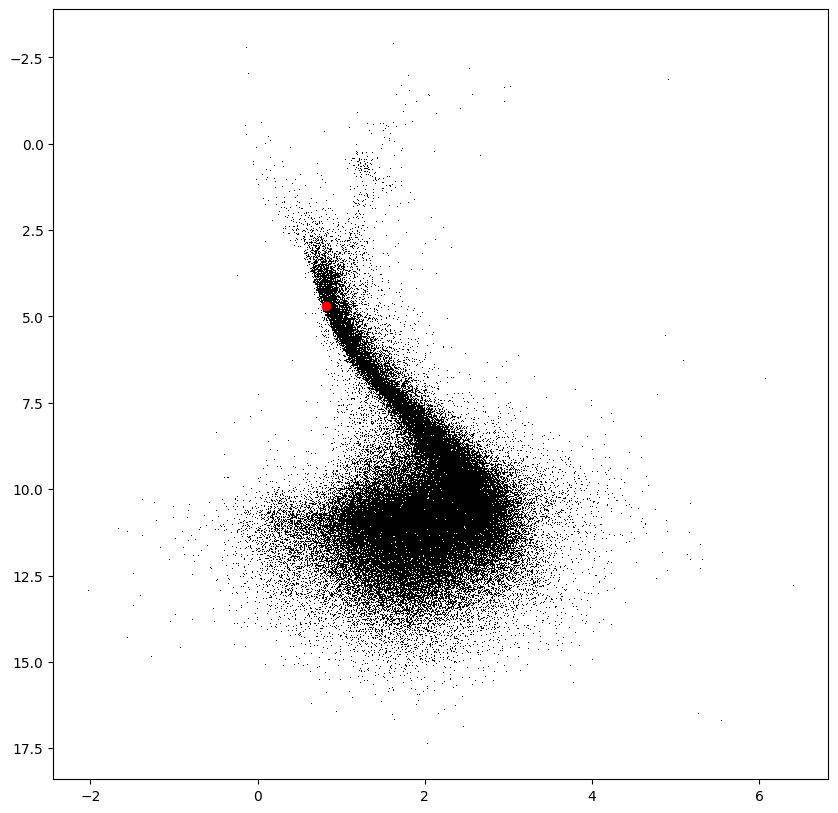

In [15]:

# plot the H-R diagram for 1 M stars within 200 pc from the Sun
from matplotlib import colors
bp_rp = np.array(gdata['bp_rp'])
mg = np.array(gdata['mg'])

# Remove NaN values
mask = ~np.isnan(bp_rp) & ~np.isnan(mg)
bp_rp = bp_rp[mask]
mg = mg[mask]

print(len(mg))
# Subsample the data with n_rand point:


print('Magnitude if G filter data in array mg, with length ',mg.size)
print('Mag in G_BP filter - Mag in G_RP filter in array bp_rp, with length ',bp_rp.size)


fig, ax = plt.subplots(figsize=(10, 10))
## only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp[:-1], mg[:-1], bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(bp_rp, mg, alpha=0.05, s=1, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel('Color '+r'$G_{BP} - G_{RP}$')
ax.set_ylabel('Absolute Magnitude '+r'$M_G$')
cb.set_label(r'Stellar density')
plt.plot([0.82],[4.7],'ro')   # Plot the approximate location of the Sun
plt.show()


# Subsample the data with n_rand point:
n_rand = 100000
index = np.arange(mg.size)
index_s = np.random.choice(index,n_rand)
xs = bp_rp[index_s]
ys = mg[index_s]

# Make a plot of all the subsampled point:

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(xs,ys,'k,')
plt.plot([0.82],[4.7],'ro')   # Plot the approximate location of the Sun
ax.invert_yaxis()
plt.show()


In [ ]:
# First, set up a bunc hof constants:

lambda_G = 639.07
ZAB_G = 25.8010
ZV_G = 25.6878

lambda_B = 518.26
ZAB_B = 25.3540
ZV_B = 25.3385

lambda_R = 782.51
ZAB_R = 25.1040
ZV_R = 24.7479

mAB_B_R = bp_rp - ZV_B + ZAB_B + ZV_R - ZAB_R

print(mAB_B_R)

F_B_over_F_R = 10**(-(mAB_B_R)/2.5)

print(F_B_over_F_R)

# Set up some constants

k = 1.3807e-16  # cm2 g s-2 K-1   Boltzmann's constant
h = 6.6261e-27  # cm2 g s-1       Plank's constant
cl = 3.e10      # cm/s   Speed of light
sigma = 5.67e-5  # Steffan-Boltzmann constant cgs

# Find the central frequency for each band:

nu_G = cl/(lambda_G*1.e-7)
nu_B = cl/(lambda_B*1.e-7)
nu_R = cl/(lambda_R*1.e-7)

# Create an array of temperatures

T_max = 5.e5
T_min = 1000
T_arr = np.logspace(np.log10(T_min),np.log10(T_max),10000)


# Find the emissivity in each band, as a function of temperature:

I_nu_G = 2*h/cl**2 * nu_G**3 / (np.exp(h*nu_G/(k*T_arr))-1)
I_nu_B = 2*h/cl**2 * nu_B**3 / (np.exp(h*nu_B/(k*T_arr))-1)
I_nu_R = 2*h/cl**2 * nu_R**3 / (np.exp(h*nu_R/(k*T_arr))-1)



[0.93408394 0.7819023  1.8874416  ... 1.5730515  1.6586361  1.1635818 ]
[0.4230254  0.48667505 0.17580183 ... 0.23484395 0.21704291 0.34242642]
469432143583645.0 578860031644348.5 383381682023232.94


In [41]:
#calcualte the temperature for each star using the formula 
#T =(L/k)**0.25
#calculate the Radius of each star using the formula 
#R = np.sqrt(L/(4*np.pi*k*T^4))

#T = np.interp(F_B_over_F_R, I_nu_B/I_nu_R, T_arr)

print(nu_G, nu_B, nu_R)

 #Convert G-band magnitude to total flux in erg/s/Hz:

mAB_G = mg - ZV_G + ZAB_G

F_G_10 = 10**(-(mAB_G+48.6)/2.5)   # at 10 pc

F_G = F_G_10 * 4*np.pi * (10*3.086e18)**2   # Total power at G wavelength

# Now use temperature to convert G-band flux to total luminosity

LT = sigma * T**4 / np.pi   # Total luminsoty, scales as sigma*T^4/pi
I_G = 2*h/cl**2 * nu_G**3 / (np.exp(h*nu_G/(k*T))-1)
#LT = LT[mask]
#I_G = I_G[mask]
L_G_ratio = LT/ (I_G)   # Ratio of total to G-band flux
L = F_G * L_G_ratio




469432143583645.0 578860031644348.5 383381682023232.94


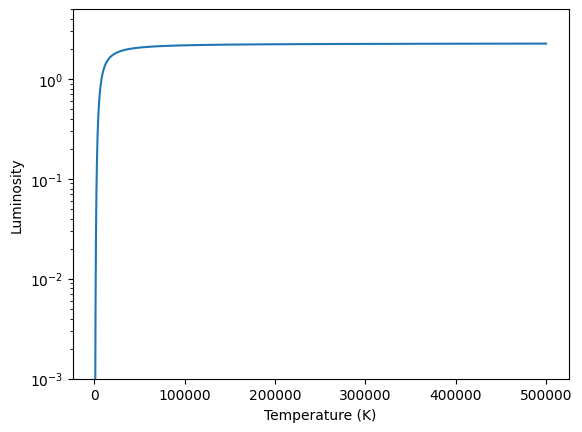

In [42]:

# Create an array of temperatures

# Interpolate to find the temperature for each B/R flux ratio observation:
T = np.interp(F_B_over_F_R, I_nu_B/I_nu_R, T_arr)


T_max = 5.e5
T_min = 1000
T_arr = np.logspace(np.log10(T_min),np.log10(T_max),10000)


# Find the emissivity in each band, as a function of temperature:

I_nu_G = 2*h/cl**2 * nu_G**3 / (np.exp(h*nu_G/(k*T_arr))-1)
I_nu_B = 2*h/cl**2 * nu_B**3 / (np.exp(h*nu_B/(k*T_arr))-1)
I_nu_R = 2*h/cl**2 * nu_R**3 / (np.exp(h*nu_R/(k*T_arr))-1)


# Plot B/R flux ratio as a function of temperature

plt.plot(T_arr,I_nu_B/I_nu_R)
plt.yscale('log')
plt.ylim(1.e-3,5.)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity')
plt.show()


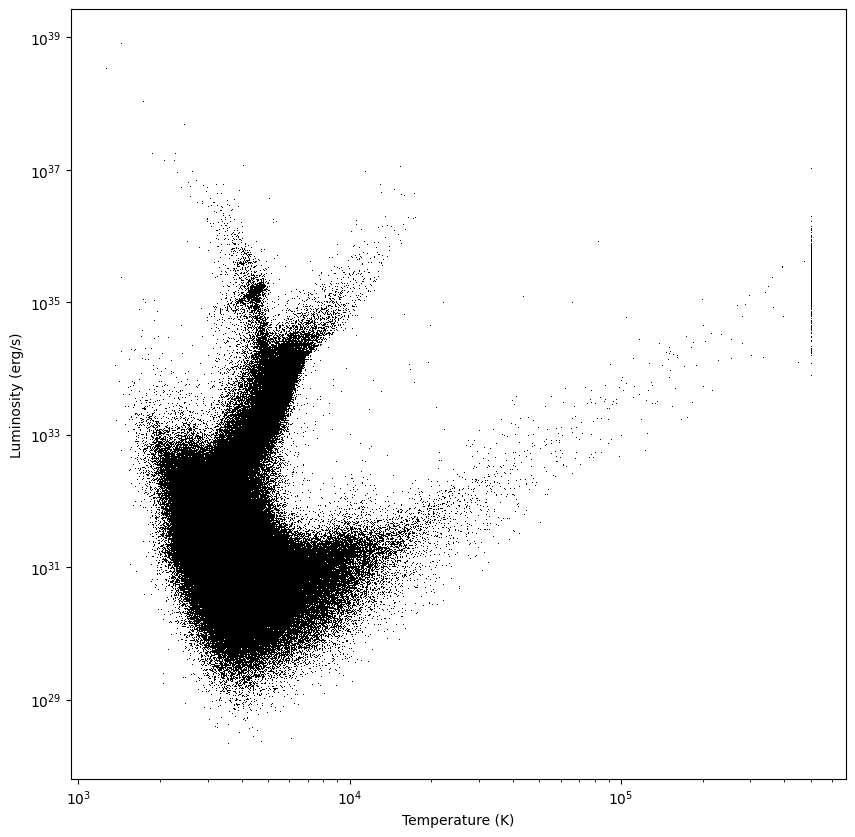

In [43]:

# Interpolate to find the temperature for each B/R flux ratio observation:
T = np.interp(F_B_over_F_R, I_nu_B/I_nu_R, T_arr)

# Ensure T and L have the same shape
min_length = min(len(T), len(L))
T = T[:min_length]
L = L[:min_length]

fig, ax = plt.subplots(figsize=(10, 10))
#h = ax.hist2d(T,L, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
#fig, ax = plt.subplots(figsize=(10,5))
#cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.plot(T, L, 'k,')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity (erg/s)')
plt.show()

O Star: 0.09%
B Star: 0.49%
A Star: 0.98%
F Star: 2.07%
G Star: 5.39%
K Star: 31.83%
M Star: 57.83%
L Star: 1.31%
T Star: 0.00%
Y Star: 0.00%


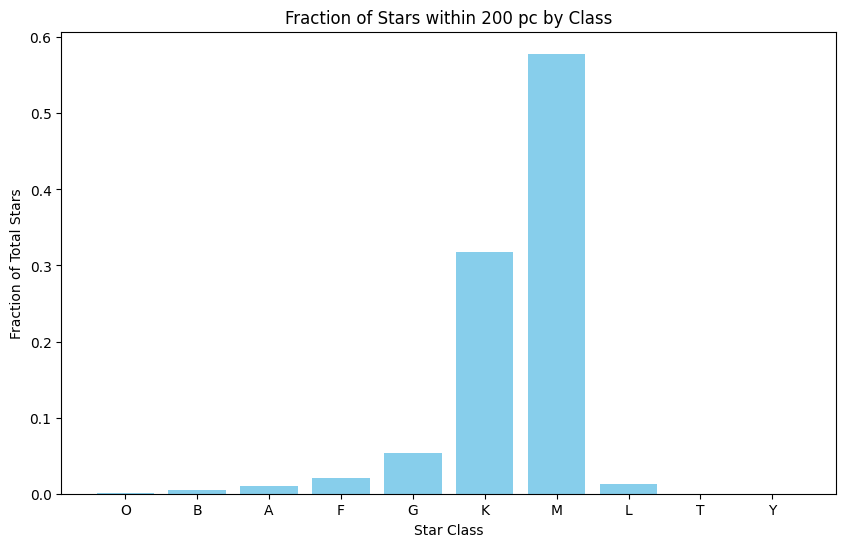

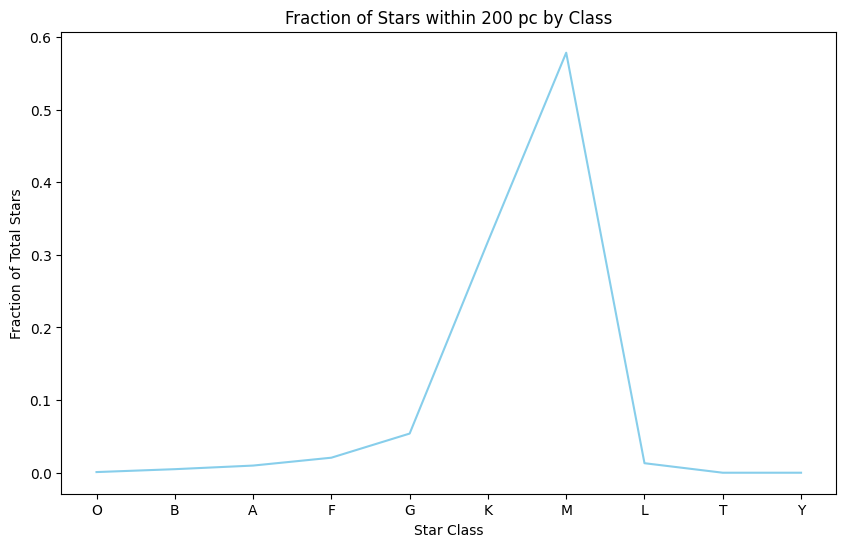

In [44]:
O_star_index = np.where(T > 30000)
B_star_index = np.where((T > 10000) & (T <= 30000))
A_star_index = np.where((T > 7500) & (T <= 10000))
F_star_index = np.where((T > 6000) & (T <= 7500))
G_star_index = np.where((T > 5200) & (T <= 6000))
K_star_index = np.where((T > 3700) & (T <= 5200))
M_star_index = np.where((T > 2400) & (T <= 3700))
L_star_index = np.where((T > 1300) & (T <= 2400))
T_star_index = np.where((T > 700) & (T <= 1300))
Y_star_index = np.where(T <= 700)

total_stars = T.size

fractions = {
    'O': O_star_index[0].shape[0] / total_stars,
    'B': B_star_index[0].shape[0] / total_stars,
    'A': A_star_index[0].shape[0] / total_stars,
    'F': F_star_index[0].shape[0] / total_stars,
    'G': G_star_index[0].shape[0] / total_stars,
    'K': K_star_index[0].shape[0] / total_stars,
    'M': M_star_index[0].shape[0] / total_stars,
    'L': L_star_index[0].shape[0] / total_stars,
    'T': T_star_index[0].shape[0] / total_stars,
    'Y': Y_star_index[0].shape[0] / total_stars
}

# Print fractions
for star_class, fraction in fractions.items():
    print(f"{star_class} Star: {fraction * 100:.2f}%")

# Plotting the fractions
classes = list(fractions.keys())
values = list(fractions.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, values, color='skyblue')
#plt.plot(classes, values, color='skyblue')
plt.xlabel('Star Class')
plt.ylabel('Fraction of Total Stars')
plt.title('Fraction of Stars within 200 pc by Class')
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(classes, values, color='skyblue')
plt.xlabel('Star Class')
plt.ylabel('Fraction of Total Stars')
plt.title('Fraction of Stars within 200 pc by Class')
plt.show()

In [ ]:
#need to fix the R value

blue_giant = np.argwhere(R > 10)
main_sequence = np.argwhere((R > 0.1) & (R <= 10))
red_dwarf = np.argwhere(R <= 0.1)
white_dwarf = np.argwhere(R < 0.01)
print(f"Blue Giant: {blue_giant.size}")
print(f"Main Sequence: {main_sequence.size}")
print(f"Red Dwarf: {red_dwarf.size}")
print(f"White Dwarf: {white_dwarf.size}")

NameError: name 'R' is not defined